# Analyisis of fermentation data from scale-down experiments with substrate and/or oxygen oscillations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from matplotlib.patches import Patch
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

from matplotlib.patches import ConnectionPatch

In [4]:
offline_data_o2 = pd.read_excel("../data/processed_fermentation_data/oxygen_scale-down_offline_data.xlsx")
online_data_o2 = pd.read_excel("../data/processed_fermentation_data/oxygen_scale-down_online_data.xlsx")
offline_data_o2 = offline_data_o2[offline_data_o2['Timepoint (#)'] != 'S08']
offline_data_o2.head()

,Timepoint Sample,Experiment,Parent Culture,Reactor/Plate/Flask Number,Timepoint (#),Timepoint (h),Sample volume (mL),OD,D-glucose [g/L],acetic acid [g/L],...,net_ethanol_cmol,net_acetic_acid_cmol,net_citric_acid_cmol,net_formic_acid_cmol,net_lactate_cmol,net_pyruvic_acid_cmol,net_succinic_acid_cmol,Formed_CO2,Consumed_O2,Base_volume
0,DDB_PD_131_AMBR_R05__S01,DDB_PD_131_AMBR,DDB_PD_131_AMBR_DDB35-006_R05_Main_,R05,S01,22.806129,1.0,75.28,0.0,0.242199,...,0.000000,0.000917,0.000546,0.000000,0.000000,0.0,0.001993,0.055104,0.056613,6.360297
1,DDB_PD_131_AMBR_R05__S02,DDB_PD_131_AMBR,DDB_PD_131_AMBR_DDB35-006_R05_Main_,R05,S02,29.826324,1.5,109.30,0.0,0.336886,...,0.000000,0.001389,0.000478,0.003071,0.000525,0.0,0.003322,0.102024,0.100641,10.389672
2,DDB_PD_131_AMBR_R05__S03,DDB_PD_131_AMBR,DDB_PD_131_AMBR_DDB35-006_R05_Main_,R05,S03,36.825055,1.5,152.70,0.0,0.378179,...,0.001059,0.001699,0.000389,0.003124,0.000817,0.0,0.003943,0.153749,0.150112,14.771014
3,DDB_PD_131_AMBR_R05__S04,DDB_PD_131_AMBR,DDB_PD_131_AMBR_DDB35-006_R05_Main_,R05,S04,43.824616,1.5,178.40,0.0,0.385366,...,0.001193,0.001885,0.000234,0.002620,0.000942,0.0,0.004348,0.211811,0.206205,19.215153
4,DDB_PD_131_AMBR_R05__S05,DDB_PD_131_AMBR,DDB_PD_131_AMBR_DDB35-006_R05_Main_,R05,S05,50.825850,1.5,212.00,0.0,0.374385,...,0.000024,0.001994,0.000017,0.002179,0.001084,0.0,0.004469,0.276705,0.269766,23.862755


## Biomass

### Biomass timeplots

C:\Users\jonas\AppData\Local\Temp\ipykernel_21888\2707800379.py:19: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
C:\Users\jonas\AppData\Local\Temp\ipykernel_21888\2707800379.py:19: UserWarning: 
The dashes list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(


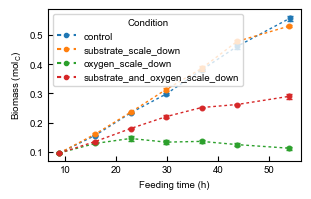

In [5]:
x='average_feed_time'
y='net_biomass_cmol'
data=offline_data_o2

# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams["legend.markerscale"] = 1

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

# figure size
height_cm = 5
width_cm = 8.3

fig, axs = plt.subplots(figsize=(width_cm/2.54,height_cm/2.54))

g = sns.lineplot(
    ax=axs,
    data=data,
    hue='Condition',
    x=x,
    y=y,
    style='Condition',
    dashes=[(2, 2)],
    linewidth = 1,
    errorbar = 'sd',
    err_style='bars',
    err_kws = {
        'elinewidth':1.0,
        'capsize':2.0
    },
    # marker styles
    markersize=7,
    markers=['.'],
    markeredgecolor=None
)

axs.tick_params(direction='in')
# axs.get_legend().remove()

axs.set_xlabel('Feeding time (h)')
axs.set_ylabel('Biomass ' + '$(mol_{C})$');

### Biomass boxplots (S07)

In [6]:
barplot_CDW_mean = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).mean()['net_biomass_cmol'].reset_index()
barplot_CDW_mean

,Strain Batch,Condition,net_biomass_cmol
0,DDB35-006,control,0.555962
1,DDB35-006,oxygen_scale_down,0.112606
2,DDB35-006,substrate_and_oxygen_scale_down,0.289653
3,DDB35-006,substrate_scale_down,0.530134


In [7]:
barplot_CDW_mean['order'] = [0,2,3,1]
barplot_CDW_mean = barplot_CDW_mean.sort_values('order')
barplot_CDW_mean

,Strain Batch,Condition,net_biomass_cmol,order
0,DDB35-006,control,0.555962,0
3,DDB35-006,substrate_scale_down,0.530134,1
1,DDB35-006,oxygen_scale_down,0.112606,2
2,DDB35-006,substrate_and_oxygen_scale_down,0.289653,3


In [8]:
barplot_CDW_std = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).std()['net_biomass_cmol'].reset_index()
barplot_CDW_std

,Strain Batch,Condition,net_biomass_cmol
0,DDB35-006,control,0.008641
1,DDB35-006,oxygen_scale_down,0.004800
2,DDB35-006,substrate_and_oxygen_scale_down,0.007761
3,DDB35-006,substrate_scale_down,0.004681


In [9]:
barplot_CDW_std['order'] = [0,2,3,1]
barplot_CDW_std = barplot_CDW_std.sort_values('order')
barplot_CDW_std

,Strain Batch,Condition,net_biomass_cmol,order
0,DDB35-006,control,0.008641,0
3,DDB35-006,substrate_scale_down,0.004681,1
1,DDB35-006,oxygen_scale_down,0.004800,2
2,DDB35-006,substrate_and_oxygen_scale_down,0.007761,3


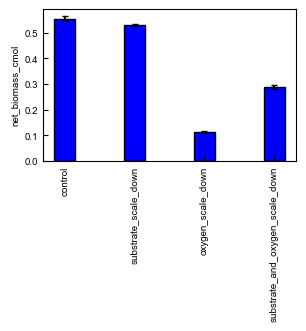

In [10]:
# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams["legend.markerscale"] = 0

params = {'mathtext.default': 'regular' }       
plt.rcParams.update(params)

# figure size
height_cm = 5
width_cm = 8.3

fig, axs = plt.subplots(figsize=(width_cm/2.54,height_cm/2.54))

# width of the bars
barWidth = 0.3

bars = list(barplot_CDW_mean['net_biomass_cmol'])

yerr = list(barplot_CDW_std['net_biomass_cmol'])

# The x position of bars
r1 = np.arange(len(bars))
 
# Create blue bars
axs.bar(r1, bars, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yerr, capsize=2)
 
# general layout
plt.xticks([r for r in range(len(bars))], list(barplot_CDW_mean['Condition']), rotation=90)
axs.set_ylabel('net_biomass_cmol')

axs.tick_params(direction='in')
# axs.set_ylim(0,0.8)
# axs.get_legend().remove()

In [11]:
offline_data_o2['biomass_yield_cmol_cmol'] = offline_data_o2['net_biomass_cmol']/offline_data_o2['net_glucose_cmol']

In [12]:
barplot_Ysx_mean = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).mean()['biomass_yield_cmol_cmol'].reset_index()
barplot_Ysx_mean

,Strain Batch,Condition,biomass_yield_cmol_cmol
0,DDB35-006,control,0.501484
1,DDB35-006,oxygen_scale_down,0.147886
2,DDB35-006,substrate_and_oxygen_scale_down,0.267308
3,DDB35-006,substrate_scale_down,0.478902


In [13]:
barplot_Ysx_mean['order'] = [0,2,3,1]
barplot_Ysx_mean = barplot_Ysx_mean.sort_values('order')
barplot_Ysx_mean

,Strain Batch,Condition,biomass_yield_cmol_cmol,order
0,DDB35-006,control,0.501484,0
3,DDB35-006,substrate_scale_down,0.478902,1
1,DDB35-006,oxygen_scale_down,0.147886,2
2,DDB35-006,substrate_and_oxygen_scale_down,0.267308,3


In [14]:
barplot_Ysx_std = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).std()['biomass_yield_cmol_cmol'].reset_index()
barplot_Ysx_std

,Strain Batch,Condition,biomass_yield_cmol_cmol
0,DDB35-006,control,0.008100
1,DDB35-006,oxygen_scale_down,0.003757
2,DDB35-006,substrate_and_oxygen_scale_down,0.006822
3,DDB35-006,substrate_scale_down,0.004154


In [15]:
barplot_Ysx_std['order'] = [0,2,3,1]
barplot_Ysx_std = barplot_Ysx_std.sort_values('order')
barplot_Ysx_std

,Strain Batch,Condition,biomass_yield_cmol_cmol,order
0,DDB35-006,control,0.008100,0
3,DDB35-006,substrate_scale_down,0.004154,1
1,DDB35-006,oxygen_scale_down,0.003757,2
2,DDB35-006,substrate_and_oxygen_scale_down,0.006822,3


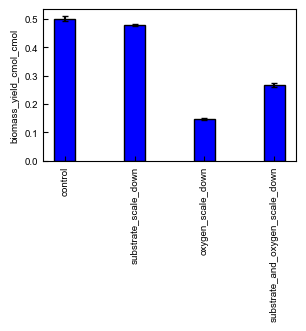

In [16]:
# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams["legend.markerscale"] = 0

params = {'mathtext.default': 'regular' }       
plt.rcParams.update(params)

# figure size
height_cm = 5
width_cm = 8.3

fig, axs = plt.subplots(figsize=(width_cm/2.54,height_cm/2.54))

# width of the bars
barWidth = 0.3

bars = list(barplot_Ysx_mean['biomass_yield_cmol_cmol'])

yerr = list(barplot_Ysx_std['biomass_yield_cmol_cmol'])

# The x position of bars
r1 = np.arange(len(bars))
 
# Create blue bars
axs.bar(r1, bars, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yerr, capsize=2)
 
# general layout
plt.xticks([r for r in range(len(bars))], list(barplot_Ysx_mean['Condition']), rotation=90)
axs.set_ylabel('biomass_yield_cmol_cmol')

axs.tick_params(direction='in')
# axs.set_ylim(0,0.8)
# axs.get_legend().remove()

## CO2 

### CO2 timeplots

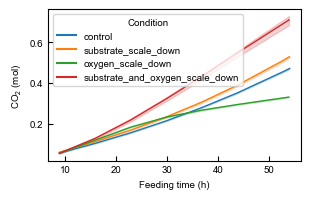

In [17]:
x='average_feed_time'
y='Formed_CO2'
data=offline_data_o2

# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams["legend.markerscale"] = 0

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

# figure size
height_cm = 5
width_cm = 8.3

fig, axs = plt.subplots(figsize=(width_cm/2.54,height_cm/2.54))

g = sns.lineplot(
    ax=axs,
    data=data,
    x=x,
    y=y,
    hue='Condition',
    linewidth = 1
)

axs.tick_params(direction='in')
# axs.get_legend().remove()

axs.set_xlabel('Feeding time (h)')
axs.set_ylabel('$CO_{2}$' + ' (mol)');

In [18]:
barplot_CO2_mean = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).mean()['Formed_CO2'].reset_index()
barplot_CO2_mean

,Strain Batch,Condition,Formed_CO2
0,DDB35-006,control,0.470734
1,DDB35-006,oxygen_scale_down,0.330216
2,DDB35-006,substrate_and_oxygen_scale_down,0.709499
3,DDB35-006,substrate_scale_down,0.528596


In [19]:
barplot_CO2_mean['order'] = [0,2,3,1]
barplot_CO2_mean = barplot_CO2_mean.sort_values('order')

In [20]:
barplot_CO2_std = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).std()['Formed_CO2'].reset_index()
barplot_CO2_std

,Strain Batch,Condition,Formed_CO2
0,DDB35-006,control,0.003146
1,DDB35-006,oxygen_scale_down,0.001781
2,DDB35-006,substrate_and_oxygen_scale_down,0.023105
3,DDB35-006,substrate_scale_down,0.004343


In [21]:
barplot_CO2_std['order'] = [0,2,3,1]
barplot_CO2_std = barplot_CO2_std.sort_values('order')

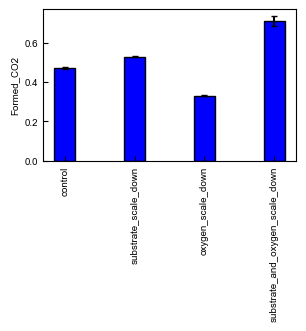

In [22]:
# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams["legend.markerscale"] = 0

params = {'mathtext.default': 'regular' }       
plt.rcParams.update(params)

# figure size
height_cm = 5
width_cm = 8.3

fig, axs = plt.subplots(figsize=(width_cm/2.54,height_cm/2.54))

# width of the bars
barWidth = 0.3

bars = list(barplot_CO2_mean['Formed_CO2'])

yerr = list(barplot_CO2_std['Formed_CO2'])

# The x position of bars
r1 = np.arange(len(bars))
 
# Create blue bars
axs.bar(r1, bars, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yerr, capsize=2)
 
# general layout
plt.xticks([r for r in range(len(bars))], list(barplot_CO2_mean['Condition']), rotation=90)
axs.set_ylabel('Formed_CO2')

axs.tick_params(direction='in')
# axs.set_ylim(0,0.8)
# axs.get_legend().remove()

### Ysc

In [23]:
offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).mean()['net_glucose_cmol'].reset_index()

,Strain Batch,Condition,net_glucose_cmol
0,DDB35-006,control,1.108641
1,DDB35-006,oxygen_scale_down,0.761305
2,DDB35-006,substrate_and_oxygen_scale_down,1.083569
3,DDB35-006,substrate_scale_down,1.106982


In [24]:
offline_data_o2['co2_yield_cmol_cmol'] = offline_data_o2['Formed_CO2']/offline_data_o2['net_glucose_cmol']

In [25]:
barplot_Ysc_mean = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).mean()['co2_yield_cmol_cmol'].reset_index()
barplot_Ysc_mean

,Strain Batch,Condition,co2_yield_cmol_cmol
0,DDB35-006,control,0.424604
1,DDB35-006,oxygen_scale_down,0.433896
2,DDB35-006,substrate_and_oxygen_scale_down,0.654780
3,DDB35-006,substrate_scale_down,0.477518


In [26]:
barplot_Ysc_mean['order'] = [0,2,3,1]
barplot_Ysc_mean = barplot_Ysc_mean.sort_values('order')

In [27]:
barplot_Ysc_std = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).std()['co2_yield_cmol_cmol'].reset_index()
barplot_Ysc_std

,Strain Batch,Condition,co2_yield_cmol_cmol
0,DDB35-006,control,0.002575
1,DDB35-006,oxygen_scale_down,0.008771
2,DDB35-006,substrate_and_oxygen_scale_down,0.021245
3,DDB35-006,substrate_scale_down,0.004776


In [28]:
barplot_Ysc_std['order'] = [0,2,3,1]
barplot_Ysc_std = barplot_Ysc_std.sort_values('order')

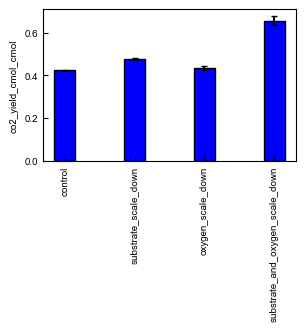

In [29]:
# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams["legend.markerscale"] = 0

params = {'mathtext.default': 'regular' }       
plt.rcParams.update(params)

# figure size
height_cm = 5
width_cm = 8.3

fig, axs = plt.subplots(figsize=(width_cm/2.54,height_cm/2.54))

# width of the bars
barWidth = 0.3

bars = list(barplot_Ysc_mean['co2_yield_cmol_cmol'])

yerr = list(barplot_Ysc_std['co2_yield_cmol_cmol'])

# The x position of bars
r1 = np.arange(len(bars))
 
# Create blue bars
axs.bar(r1, bars, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yerr, capsize=2)
 
# general layout
plt.xticks([r for r in range(len(bars))], list(barplot_Ysc_mean['Condition']), rotation=90)
axs.set_ylabel('co2_yield_cmol_cmol')

axs.tick_params(direction='in')
# axs.set_ylim(0,0.8)
# axs.get_legend().remove()

## O2 

### O2 timeplots

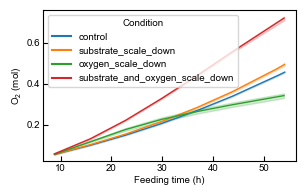

In [32]:
x='average_feed_time'
y='Consumed_O2'
data=offline_data_o2

# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams["legend.markerscale"] = 0

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

# figure size
height_cm = 5
width_cm = 8.3

fig, axs = plt.subplots(figsize=(width_cm/2.54,height_cm/2.54))

g = sns.lineplot(
    ax=axs,
    data=data,
    x=x,
    y=y,
    hue='Condition',
    linewidth = 1
)

axs.tick_params(direction='in')
# axs.get_legend().remove()

axs.set_xlabel('Feeding time (h)')
axs.set_ylabel('$O_{2}$' + ' (mol)');

In [33]:
barplot_O2_mean = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).mean()['Consumed_O2'].reset_index()
barplot_O2_mean

,Strain Batch,Condition,Consumed_O2
0,DDB35-006,control,0.456917
1,DDB35-006,oxygen_scale_down,0.342740
2,DDB35-006,substrate_and_oxygen_scale_down,0.720414
3,DDB35-006,substrate_scale_down,0.494162


In [34]:
barplot_O2_mean['order'] = [0,2,3,1]
barplot_O2_mean = barplot_O2_mean.sort_values('order')

In [35]:
barplot_O2_std = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).std()['Consumed_O2'].reset_index()
barplot_O2_std

,Strain Batch,Condition,Consumed_O2
0,DDB35-006,control,0.001789
1,DDB35-006,oxygen_scale_down,0.011227
2,DDB35-006,substrate_and_oxygen_scale_down,0.010308
3,DDB35-006,substrate_scale_down,0.007062


In [36]:
barplot_O2_std['order'] = [0,2,3,1]
barplot_O2_std = barplot_O2_std.sort_values('order')

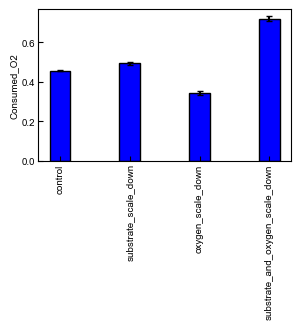

In [37]:
# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams["legend.markerscale"] = 0

params = {'mathtext.default': 'regular' }       
plt.rcParams.update(params)

# figure size
height_cm = 5
width_cm = 8.3

fig, axs = plt.subplots(figsize=(width_cm/2.54,height_cm/2.54))

# width of the bars
barWidth = 0.3

bars = list(barplot_O2_mean['Consumed_O2'])

yerr = list(barplot_O2_std['Consumed_O2'])

# The x position of bars
r1 = np.arange(len(bars))
 
# Create blue bars
axs.bar(r1, bars, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yerr, capsize=2)
 
# general layout
plt.xticks([r for r in range(len(bars))], list(barplot_CO2_mean['Condition']), rotation=90)
axs.set_ylabel('Consumed_O2')

axs.tick_params(direction='in')
# axs.set_ylim(0,0.8)
# axs.get_legend().remove()

### Yso

In [38]:
offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).mean()['net_glucose_cmol'].reset_index()

,Strain Batch,Condition,net_glucose_cmol
0,DDB35-006,control,1.108641
1,DDB35-006,oxygen_scale_down,0.761305
2,DDB35-006,substrate_and_oxygen_scale_down,1.083569
3,DDB35-006,substrate_scale_down,1.106982


In [39]:
offline_data_o2['o2_yield_mol_cmol'] = offline_data_o2['Consumed_O2']/offline_data_o2['net_glucose_cmol']

In [40]:
barplot_Yso_mean = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).mean()['o2_yield_mol_cmol'].reset_index()
barplot_Yso_mean

,Strain Batch,Condition,o2_yield_mol_cmol
0,DDB35-006,control,0.412141
1,DDB35-006,oxygen_scale_down,0.450211
2,DDB35-006,substrate_and_oxygen_scale_down,0.664840
3,DDB35-006,substrate_scale_down,0.446396


In [41]:
barplot_Yso_mean['order'] = [0,2,3,1]
barplot_Yso_mean = barplot_Yso_mean.sort_values('order')

In [42]:
barplot_Yso_std = offline_data_o2[offline_data_o2['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).std()['o2_yield_mol_cmol'].reset_index()
barplot_Yso_std

,Strain Batch,Condition,o2_yield_mol_cmol
0,DDB35-006,control,0.001688
1,DDB35-006,oxygen_scale_down,0.010267
2,DDB35-006,substrate_and_oxygen_scale_down,0.007869
3,DDB35-006,substrate_scale_down,0.005238


In [43]:
barplot_Yso_std['order'] = [0,2,3,1]
barplot_Yso_std = barplot_Yso_std.sort_values('order')

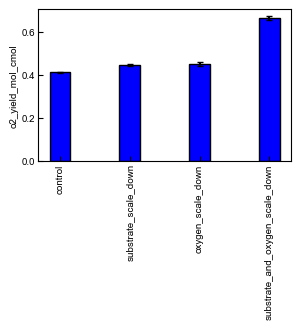

In [44]:
# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams["legend.markerscale"] = 0

params = {'mathtext.default': 'regular' }       
plt.rcParams.update(params)

# figure size
height_cm = 5
width_cm = 8.3

fig, axs = plt.subplots(figsize=(width_cm/2.54,height_cm/2.54))

# width of the bars
barWidth = 0.3

bars = list(barplot_Yso_mean['o2_yield_mol_cmol'])

yerr = list(barplot_Yso_std['o2_yield_mol_cmol'])

# The x position of bars
r1 = np.arange(len(bars))
 
# Create blue bars
axs.bar(r1, bars, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yerr, capsize=2)
 
# general layout
plt.xticks([r for r in range(len(bars))], list(barplot_Yso_mean['Condition']), rotation=90)
axs.set_ylabel('o2_yield_mol_cmol')

axs.tick_params(direction='in')
# axs.set_ylim(0,0.8)
# axs.get_legend().remove()

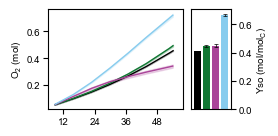

In [47]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=4)

# frame = fig.add_subplot(spec[:,:])
ax1 = fig.add_subplot(spec[0,:3])
ax1_yield = fig.add_subplot(spec[0,3])

###################################
### O2 timeplot
###################################

for idx_condition, str_condition in enumerate(barplot_Ysx_mean['Condition'].unique()):

    g = sns.lineplot(
        ax=ax1,
        data=offline_data_o2[offline_data_o2['Condition'] == str_condition],
        x='average_feed_time',
        y='Consumed_O2',
        linewidth = 1,
        errorbar = "sd",
        color=matplotlib.colors.to_rgb(cb_B[idx_condition])+(1,)
    )

###################################
### CO2 yield plot
###################################

# width of the bars
barWidth = 0.7

bars_Yso = list(barplot_Yso_mean['o2_yield_mol_cmol'])
yerr_Yso = list(barplot_Yso_std['o2_yield_mol_cmol'])


for r1, str_condition in enumerate(barplot_Yso_mean['Condition'].unique()):

    ax1_yield.bar(r1, bars_Yso[r1], width = barWidth, color = matplotlib.colors.to_rgb(cb_B[r1])+(1,), edgecolor = None, yerr=yerr_Yso[r1], capsize=1.5,error_kw={"elinewidth":0.5,"capthick":0.5})

ax1_yield.set_xticks([])
ax1_yield.set_xlim(-0.7,3.7)
ax1.set_xlabel('')
ax1.set_ylabel('$O_{2}$ (mol)')
ax1_yield.set_ylabel('Yso (mol/$mol_{C}$)')

ax1.set_xlim(6,58)
ax1.set_xticks([12,24,36,48])
# ax1.set_xticklabels([])

ax1_yield.yaxis.set_label_position("right")
ax1_yield.yaxis.tick_right()

w=60/25.4
h=33/25.4
fig.set_size_inches(w=w,h=h)

plt.savefig("Consumed_O2_figure_raw.svg", dpi=900);

## Results Figure

In [30]:
cb_B_1 = '#332288'
cb_B_2 = '#117733'
cb_B_3 = '#44AA99'
cb_B_4 = '#88CCEE'
cb_B_5 = '#DDCC77'
cb_B_6 = '#CC6677'
cb_B_7 = '#AA4499'
cb_B_8 = '#882255'

cb_B = ["k", cb_B_2, cb_B_7, cb_B_4]

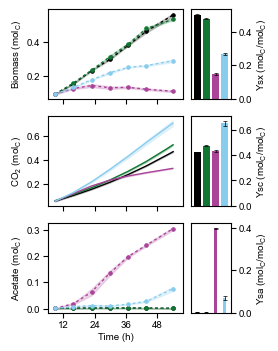

In [31]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()
spec = fig.add_gridspec(nrows=3, ncols=4)

# frame = fig.add_subplot(spec[:,:])
ax1 = fig.add_subplot(spec[0,:3])
ax1_yield = fig.add_subplot(spec[0,3])

ax2 = fig.add_subplot(spec[1,:3])
ax2_yield = fig.add_subplot(spec[1,3])

ax3 = fig.add_subplot(spec[2,:3])
ax3_yield = fig.add_subplot(spec[2,3])


###################################
### Acetate timeplots
###################################

for idx_condition, str_condition in enumerate(barplot_Ysx_mean['Condition'].unique()):

    g = sns.lineplot(
        ax=ax3,
        data=offline_data_o2[offline_data_o2['Condition'] == str_condition],
        x='average_feed_time',
        y='net_acetic_acid_cmol',
        linewidth = 1,
        color=matplotlib.colors.to_rgb(cb_B[idx_condition])+(1,),
        dashes=[(2, 2)],
        style='Condition',
        # marker styles
        markersize=5,
        markers=['.'],
        errorbar = "sd",
        markeredgecolor=None
    )

###################################
### Acetate yield plot
###################################

copy_df = offline_data_o2.copy()
copy_df['acid_yield'] = copy_df['net_acetic_acid_cmol']/copy_df['net_glucose_cmol']

barplot_mean = copy_df[copy_df['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).mean()['acid_yield'].reset_index()

barplot_mean['order'] = [0,2,3,1]
barplot_mean = barplot_mean.sort_values('order')
bars = barplot_mean['acid_yield'].values

barplot_std = copy_df[copy_df['Timepoint (#)'] == 'S07'].groupby(['Strain Batch','Condition']).std()['acid_yield'].reset_index()
barplot_std['order'] = [0,2,3,1]
barplot_std = barplot_std.sort_values('order')
yerr = barplot_std['acid_yield'].values

for r1, str_condition in enumerate(barplot_mean['Condition'].unique()):

    ax3_yield.bar(r1, bars[r1], width = barWidth, color = matplotlib.colors.to_rgb(cb_B[r1])+(1,), edgecolor = None, yerr=yerr[r1], capsize=1.5,error_kw={"elinewidth":0.5,"capthick":0.5})

# ax3.spines["right"].set_visible(False)
# ax3_yield.spines["right"].set_visible(False)

# ax3.spines["top"].set_visible(False)
# ax3_yield.spines["top"].set_visible(False)

ax3_yield.set_xticks([])
ax3_yield.set_xlim(-0.7,3.7)

ax3.set_xlabel('Time (h)')

ax3.set_ylabel('Acetate ($mol_{C}$)')
ax3_yield.set_ylabel('Ysa ($mol_{C}$/$mol_{C}$)')

ax3.get_legend().remove()


###################################
### Biomass timeplots
###################################

for idx_condition, str_condition in enumerate(barplot_Ysx_mean['Condition'].unique()):

    g = sns.lineplot(
        ax=ax1,
        data=offline_data_o2[offline_data_o2['Condition'] == str_condition],
        x='average_feed_time',
        y='net_biomass_cmol',
        linewidth = 1,
        color=matplotlib.colors.to_rgb(cb_B[idx_condition])+(1,),
        dashes=[(2, 2)],
        style='Condition',
        # marker styles
        markersize=5,
        markers=['.'],
        errorbar = "sd",
        markeredgecolor=None
    )

###################################
### biomass yield plot
###################################

# width of the bars
barWidth = 0.7

bars_Ysx = list(barplot_Ysx_mean['biomass_yield_cmol_cmol'])
yerr_Ysx = list(barplot_Ysx_std['biomass_yield_cmol_cmol'])


for r1, str_condition in enumerate(barplot_mean['Condition'].unique()):

    ax1_yield.bar(r1, bars_Ysx[r1], width = barWidth, color = matplotlib.colors.to_rgb(cb_B[r1])+(1,), edgecolor = None, yerr=yerr_Ysx[r1], capsize=1.5,error_kw={"elinewidth":0.5,"capthick":0.5})

ax1_yield.set_xticks([])
ax1_yield.set_xlim(-0.7,3.7)
ax1.set_xlabel('')
ax1.set_ylabel('Biomass ($mol_{C}$)')
ax1_yield.set_ylabel('Ysx ($mol_{C}$/$mol_{C}$)')
ax1.get_legend().remove()


###################################
### CO2 timeplot
###################################

for idx_condition, str_condition in enumerate(barplot_Ysx_mean['Condition'].unique()):

    g = sns.lineplot(
        ax=ax2,
        data=offline_data_o2[offline_data_o2['Condition'] == str_condition],
        x='average_feed_time',
        y='Formed_CO2',
        linewidth = 1,
        errorbar = "sd",
        color=matplotlib.colors.to_rgb(cb_B[idx_condition])+(1,)
    )

###################################
### CO2 yield plot
###################################

# width of the bars
barWidth = 0.7

bars_Ysc = list(barplot_Ysc_mean['co2_yield_cmol_cmol'])
yerr_Ysc = list(barplot_Ysc_std['co2_yield_cmol_cmol'])


for r1, str_condition in enumerate(barplot_Ysc_mean['Condition'].unique()):

    ax2_yield.bar(r1, bars_Ysc[r1], width = barWidth, color = matplotlib.colors.to_rgb(cb_B[r1])+(1,), edgecolor = None, yerr=yerr_Ysc[r1], capsize=1.5,error_kw={"elinewidth":0.5,"capthick":0.5})

ax2_yield.set_xticks([])
ax2_yield.set_xlim(-0.7,3.7)
ax2.set_xlabel('')
ax2.set_ylabel('$CO_{2}$ $(mol_{C}$)')
ax2_yield.set_ylabel('Ysc ($mol_{C}$/$mol_{C}$)')

ax3.set_xlim(6,58)
ax3.set_xticks([12,24,36,48])

ax1.set_xlim(6,58)
ax1.set_xticks([12,24,36,48])
ax1.set_xticklabels([])

ax2.set_xlim(6,58)
ax2.set_xticks([12,24,36,48])
ax2.set_xticklabels([])

ax1_yield.yaxis.set_label_position("right")
ax1_yield.yaxis.tick_right()

ax2_yield.yaxis.set_label_position("right")
ax2_yield.yaxis.tick_right()

ax3_yield.yaxis.set_label_position("right")
ax3_yield.yaxis.tick_right()


w=60/25.4
h=100/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("Figure2_raw.svg", dpi=900);